# Chronic Kidney Disease

liac-arff, scikit-multilearn

In [42]:
import pandas as pd
import ehrapy.api as ep
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc https://raw.githubusercontent.com/odsti/datasets/master/ckd/processed/ckd_full.csv

File ‘ckd_full.csv’ already there; not retrieving.



# Data Wrangling

In [11]:
data = pd.read_csv("ckd_full.csv")

Since the dataset does not have a patient ID we add one.

In [12]:
data["Patient_id"] = range(1, len(data) + 1)

We replace nomial feartures with integers.

In [14]:
data["Red Blood Cells"].replace(("normal", "abnormal"), (1, 0), inplace=True)
data["Pus Cell"].replace(("normal", "abnormal"), (1, 0), inplace=True)
data["Pus Cell clumps"].replace(("present", "notpresent"), (1, 0), inplace=True)
data["Bacteria"].replace(("present", "notpresent"), (1, 0), inplace=True)
data["Hypertension"].replace(("yes", "no"), (1, 0), inplace=True)
data["Diabetes Mellitus"].replace(("yes", "no"), (1, 0), inplace=True)
data["Coronary Artery Disease"].replace(("yes", "no"), (1, 0), inplace=True)
data["Appetite"].replace(("good", "poor"), (1, 0), inplace=True)
data["Pedal Edema"].replace(("yes", "no"), (1, 0), inplace=True)
data["Anemia"].replace(("yes", "no"), (1, 0), inplace=True)
data["Class"].replace(("ckd", "notckd"), (1, 0), inplace=True)

In [17]:
data.set_index("Patient_id", inplace=True)

In [18]:
data.to_csv("chronic_kidney_disease_prepared.csv")

## ehrapy sanity check

In [32]:
adata = ep.io.read("ckd_full_prepared.csv",
                   extension="csv",
                   index_column="Patient_id")

In [33]:
adata.var_names

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [36]:
ep.pp.type_overview(adata)

Variable names for AnnData object with 63 vars and 400 obs                                   
╠══ 🔐 Encoded variables                                                                     
║   ╠══ Specific Gravity -> 5 categories; one hot encoded; original data type: floating      
║   ╠══ Albumin -> 6 categories; one hot encoded; original data type: floating               
║   ╠══ Sugar -> 6 categories; one hot encoded; original data type: floating                 
║   ╠══ Red Blood Cells -> 2 categories; one hot encoded; original data type: floating       
║   ╠══ Pus Cell -> 2 categories; one hot encoded; original data type: floating              
║   ╠══ Pus Cell clumps -> 2 categories; one hot encoded; original data type: floating       
║   ╠══ Bacteria -> 2 categories; one hot encoded; original data type: floating              
║   ╠══ Hypertension -> 2 categories; one hot encoded; original data type: floating          
║   ╠══ Diabetes Mellitus -> 2 categories; one hot encoded; original data type: floating     
║   ╠══ Coronary Artery Disease -> 2 categories; one hot encoded; original data type:        
║   ║   floating                                                                             
║   ╠══ Appetite -> 2 categories; one hot encoded; original data type: floating              
║   ╠══ Pedal Edema -> 2 categories; one hot encoded; original data type: floating           
║   ╠══ Anemia -> 2 categories; one hot encoded; original data type: floating                
║   ╚══ Class -> 2 categories; one hot encoded; original data type: floating                 
╚══ 🔓 Unencoded variables                                                                   
    ╠══ Age -> data type: numerical                                                          
    ╠══ Blood Pressure -> data type: numerical                                               
    ╠══ Blood Glucose Random -> data type: numerical                                         
    ╠══ Blood Urea -> data type: numerical                                                   
    ╠══ Serum Creatinine -> data type: numerical                                             
    ╠══ Sodium -> data type: numerical                                                       
    ╠══ Potassium -> data type: numerical                                                    
    ╠══ Hemoglobin -> data type: numerical                                                   
    ╠══ Packed Cell Volume -> data type: numerical                                           
    ╠══ White Blood Cell Count -> data type: numerical                                       
    ╚══ Red Blood Cell Count -> data type: numerical                                         

In [35]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["Specific Gravity", "Albumin", "Sugar", "Red Blood Cells", "Pus Cell", "Pus Cell clumps", "Bacteria", "Hypertension", "Diabetes Mellitus", "Coronary Artery Disease", "Appetite", "Pedal Edema", "Anemia", "Class"]}
)

Running one hot encoding on passed columns ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0%

In [47]:
_ = ep.pp.calculate_qc_metrics(adata)

In [38]:
adata.obs

,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,missing_values_abs,missing_values_pct
Patient_id,,,,,,,,,,,,,,,,
1,1.020,1.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,3.174603
2,1.020,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,6.349206
3,1.010,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3,4.761905
4,1.005,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0.000000
5,1.010,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,3.174603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.000000
397,1.025,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.000000
398,1.020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.000000


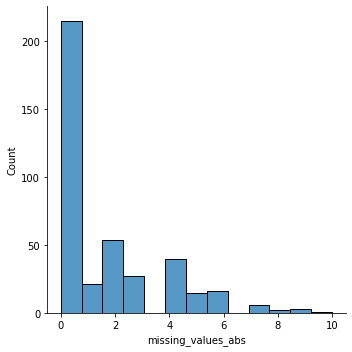

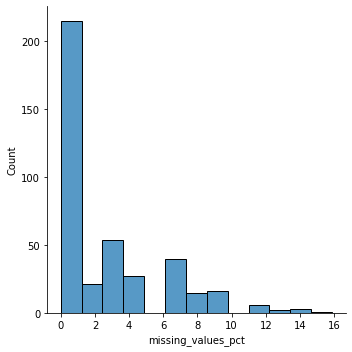

In [43]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])

In [48]:
adata.var

,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max
ehrapycat_Specific Gravity_1.005,0,0.0,0.017500,0.0,0.131125,0.0,1.000000
ehrapycat_Specific Gravity_1.01,0,0.0,0.210000,0.0,0.407308,0.0,1.000000
ehrapycat_Specific Gravity_1.015,0,0.0,0.187500,0.0,0.390312,0.0,1.000000
ehrapycat_Specific Gravity_1.02,0,0.0,0.265000,0.0,0.441333,0.0,1.000000
ehrapycat_Specific Gravity_1.025,0,0.0,0.202500,0.0,0.401863,0.0,1.000000
...,...,...,...,...,...,...,...
Potassium,0,0.0,4.568250,4.3,2.837828,2.5,47.000000
Hemoglobin,0,0.0,12.607999,13.0,2.816112,3.1,17.799999
Packed Cell Volume,0,0.0,39.095001,41.0,8.602092,9.0,54.000000
White Blood Cell Count,0,0.0,8485.250000,8300.0,2738.230713,2200.0,26400.000000


Running KNN imputation ⠋

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy-datasets/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/xinyuezhang/opt/anaconda3/envs/ehrapy-datasets/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


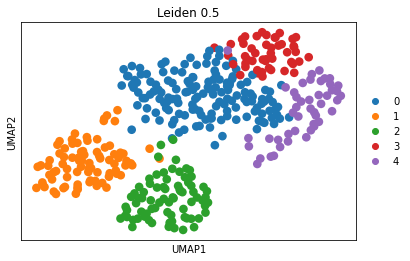

In [49]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [50]:
adata.var_names

Index(['ehrapycat_Specific Gravity_1.005', 'ehrapycat_Specific Gravity_1.01',
       'ehrapycat_Specific Gravity_1.015', 'ehrapycat_Specific Gravity_1.02',
       'ehrapycat_Specific Gravity_1.025', 'ehrapycat_Specific Gravity_nan',
       'ehrapycat_Albumin_0.0', 'ehrapycat_Albumin_1.0',
       'ehrapycat_Albumin_2.0', 'ehrapycat_Albumin_3.0',
       'ehrapycat_Albumin_4.0', 'ehrapycat_Albumin_5.0',
       'ehrapycat_Albumin_nan', 'ehrapycat_Sugar_0.0', 'ehrapycat_Sugar_1.0',
       'ehrapycat_Sugar_2.0', 'ehrapycat_Sugar_3.0', 'ehrapycat_Sugar_4.0',
       'ehrapycat_Sugar_5.0', 'ehrapycat_Sugar_nan',
       'ehrapycat_Red Blood Cells_0.0', 'ehrapycat_Red Blood Cells_1.0',
       'ehrapycat_Red Blood Cells_nan', 'ehrapycat_Pus Cell_0.0',
       'ehrapycat_Pus Cell_1.0', 'ehrapycat_Pus Cell_nan',
       'ehrapycat_Pus Cell clumps_0.0', 'ehrapycat_Pus Cell clumps_1.0',
       'ehrapycat_Pus Cell clumps_nan', 'ehrapycat_Bacteria_0.0',
       'ehrapycat_Bacteria_1.0', 'ehrapycat_Bacteria

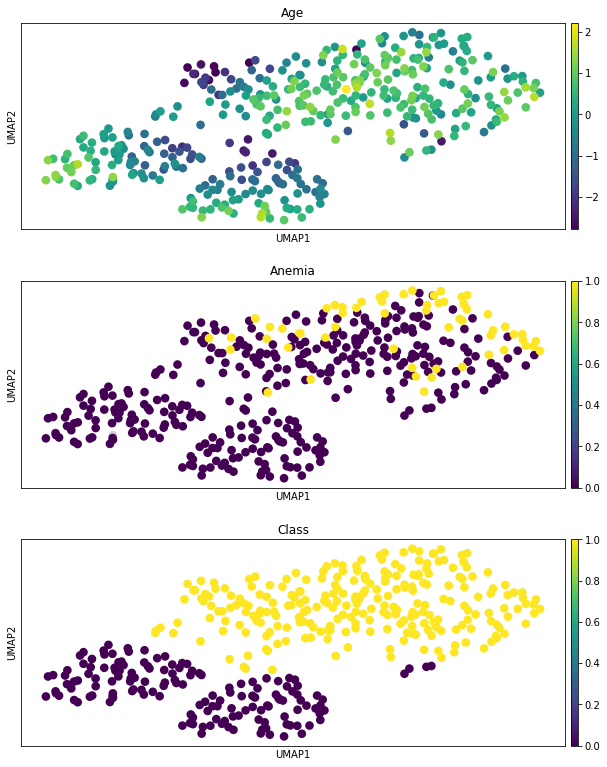

In [51]:
ep.pl.umap(adata, color=["Age", "Anemia", "Class",], ncols=1, wspace=0.75)